In [2]:
#Imports
import time
import numpy as np
import math

from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 9, 6 

In [3]:
def plot_figure(all_values, t_l):
    fig = plt.figure(figsize=(12,14))
    subs = int(len(all_values) / 3)
    fig.suptitle(f'metapopulation-model with {subs} subpopulations', fontsize=16)

    ax1 = plt.subplot(311)
    for i, X in enumerate(all_values[0::3]):
        ax1.plot(t_l, X, label=f"Susceptible {i}")


    ax2 = plt.subplot(312)
    for i, Y in enumerate(all_values[1::3]):
        ax2.plot(t_l, Y, label=f"Infected {i}")


    ax3 = plt.subplot(313)
    for i, Z in enumerate(all_values[2::3]):
        ax3.plot(t_l, Z, label=f"Recovered {i}")


    for axis in [ax1, ax2, ax3]:
        axis.set_xlabel(r'Time (days)',fontsize=12)
        axis.set_ylabel(r'Number of People',fontsize=12)
        axis.legend(fontsize=12)
        axis.grid()

    plt.show()
    
def plot_save_figure(all_values, t_l):
    """
    This function plots a figure of only the infected and saves it as meta_infected.png
    """
    fig = plt.figure(figsize=(10,6))
    subs = int(len(all_values) / 3)
    fig.suptitle(f'SIR-model with {subs} subpopulations', fontsize=16)


    ax2 = plt.subplot(111)
    for i, Y in enumerate(all_values[1::3]):
        ax2.plot(t_l, Y, label=f"Infected {i}")


    ax2.set_xlabel(r'Time (days)',fontsize=12)
    ax2.set_ylabel(r'Number of People',fontsize=12)

    ax2.legend(fontsize=12)
    ax2.grid()
    plt.savefig("meta_infected.png")

    plt.show()

In [4]:
def SIR_stoch(values, beta, gamma, mu, ro):
    """
    values is a list [X0, Y0, Z0, X1, Y1, Z1, ...]
    beta and gamma are the same for all populations.
    Ro_ij = ro if i!=j, otherwise it's 1.

    """
    subs = int(len(values) / 3)
    events = []
    
    
    for i in range(subs):
        X = values[i*3]
        Y = values[i*3 + 1]
        Z = values[i*3 + 2]

        N = X+Y+Z

        sommetje = 0
        for j in range(subs):
            if N!= 0:
                if i == j:
                    sommetje +=  Y / N
                else:
                    sommetje += ro * values[j*3 + 1] / N
        
        labda = beta * sommetje
        
        events += [mu*N, labda * X, gamma * Y, mu*X, mu*Y, mu*Z]

        
    
    dt = [np.log(np.random.uniform()) / (-i) for i in events]
    index = dt.index(min(dt))

    index_2 = index%6
    
    index_3 = int((index - index_2) / 6)
    
    
    if index_2 == 0:
        values[index_3*3] += 1
    elif index_2 == 1:
        values[index_3*3] -= 1
        values[index_3*3 + 1] += 1
    elif index_2 == 2:
        values[index_3*3 + 1] -= 1
        values[index_3*3 + 2] += 1
    elif index_2 == 3:
        values[index_3*3] -= 1
    elif index_2 == 4:
        values[index_3*3 + 1] -= 1
    elif index_2 == 5:
        values[index_3*3 + 2] -= 1

    return values, min(dt), index


def run_time(values, t_end, beta, gamma, mu, ro):
    """
    values is een lijst X0, Y0, Z0, X1, Y1, Z1, enz
    """
    values_0 = []
    for value in values:
        values_0.append([value])

    t_l = [0]
    index_l = []
    counter = 0
    
    while t_l[-1] < t_end:
        inp = []
        for value in values_0:
            inp.append(value[-1])
        new_values, dt, index = SIR_stoch(inp, beta, gamma, mu, ro)
        
        for i, new_value in enumerate(new_values):
            values_0[i].append(new_value)

        t_l.append(t_l[-1]+dt)
        index_l.append(index)
        counter += 1

    print("%i events happend" %counter)

    return values_0, t_l, index_l

def run_event(values, events, beta, gamma, mu, ro):
    values_0 = []
    for value in values:
        values_0.append([value])

    t_l = [0]
    index_l = []
    counter = 0
    
    while counter < events:
        inp = []
        for value in values_0:
            inp.append(value[-1])
        new_values, dt, index = SIR_stoch(inp, beta, gamma, mu, ro)
        
        for i, new_value in enumerate(new_values):
            values_0[i].append(new_value)

        t_l.append(t_l[-1]+dt)
        index_l.append(index)
        counter += 1

    
    print("%i events happend" %counter)
    return values_0, t_l, index_l

# Event based
Use this function if you want to run the simulation for a given number of events, by changing the events parameter.

<ipython-input-4-ebac1056a242>:33: RuntimeWarning: divide by zero encountered in double_scalars
  dt = [np.log(np.random.uniform()) / (-i) for i in events]


10000 events happend


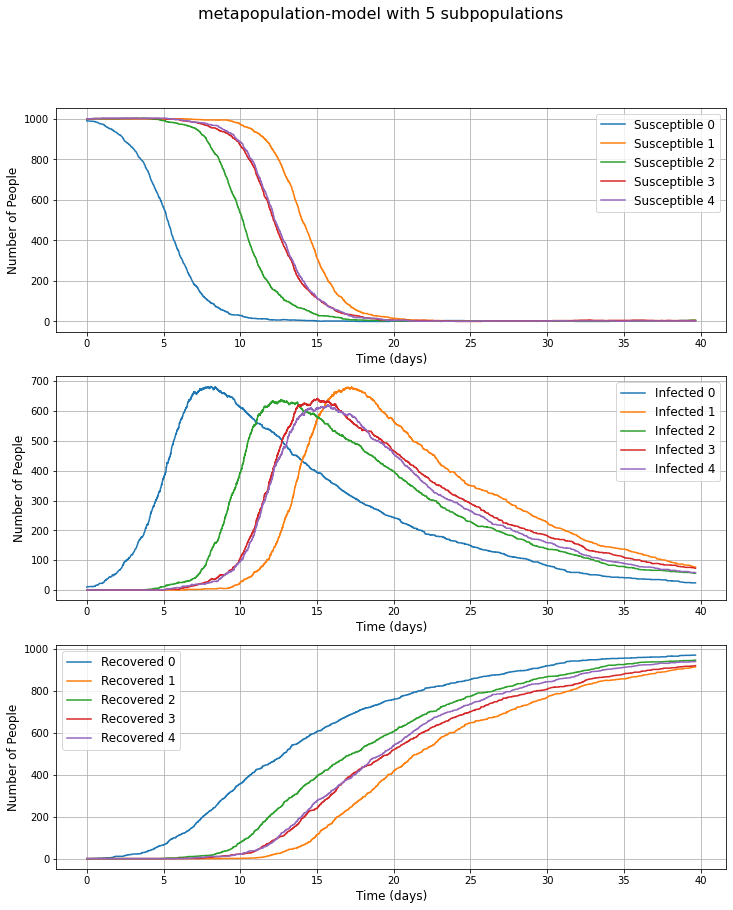

In [5]:
X0 = 1e3 - 10
Y0 = 10
Z0 = 0
X1 = 1e3
Y1 = 0
Z1 = 0
values = [X0, Y0, Z0]
total_populations = 5
for i in range(total_populations-1):
    values += [X1, Y1, Z1]
events = 10e3
beta=1
gamma=1/10
mu=5e-4
ro = 0.001


all_values, t_l, index_l  = run_event(values, events, beta, gamma, mu, ro)

plot_figure(all_values, t_l)

# Time based
Use this function if you want the simulation to end after a certain amount of time in days by changing t_end.

<ipython-input-4-ebac1056a242>:33: RuntimeWarning: divide by zero encountered in double_scalars
  dt = [np.log(np.random.uniform()) / (-i) for i in events]


4181 events happend


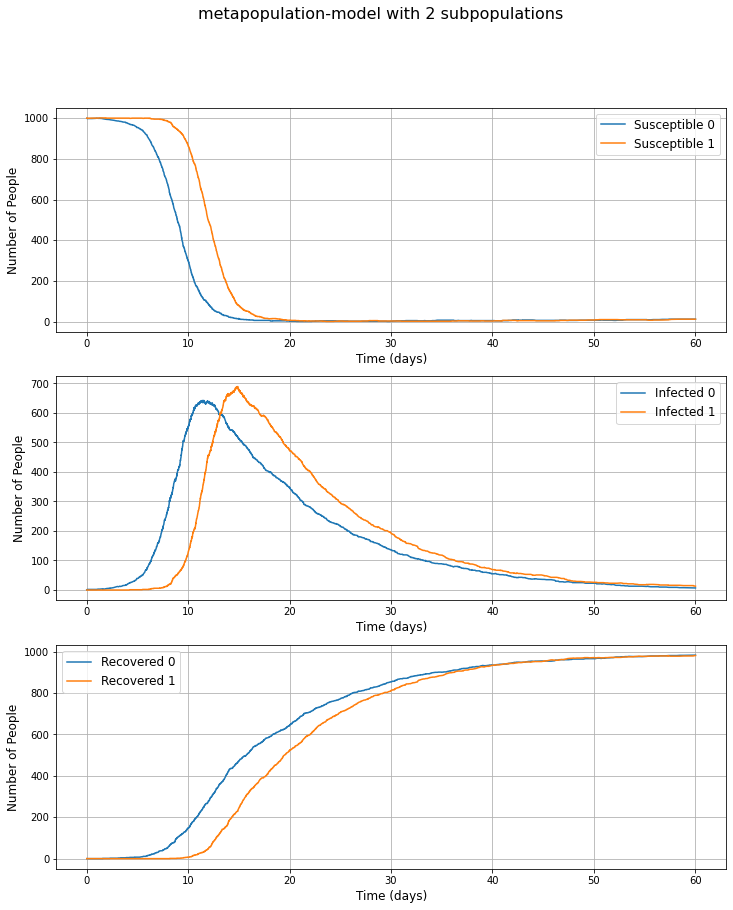

In [6]:
X0 = 1e3 - 1
Y0 = 1
Z0 = 0
X1 = 1e3
Y1 = 0
Z1 = 0
values = [X0, Y0, Z0]
total_populations = 2
for i in range(total_populations-1):
    values += [X1, Y1, Z1]

t_end = 60

beta=1
gamma=1/10
mu=0.0005
ro = 0.001



all_values, t_l, index_l = run_time(values, t_end, beta, gamma, mu, ro)

plot_figure(all_values, t_l)